## Purpose 
This notebook is intented to create and explore different ratio calulations. Functions used can be found in utils/ratio

Last notebook we explored the most cannonical way of calculating power band ratios. This notebook will add 2 more methods of calculating ratios. Additionally we will be running a simulation to calculate band ratios from synthetic data.

In [2]:
# Set matplotlib for plotting in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from fooof import FOOOF
from fooof import FOOOFGroup
from fooof.utils import trim_spectrum
from fooof.synth import gen_group_power_spectra, param_sampler, gen_power_spectrum

from utils.ratios import *

## Simulate Power Spectra

In [18]:
#Gen group of PSDs regular PSD

theta_band = [4,8]
beta_band = [15,30]
freqs, powers, _ = gen_group_power_spectra(100, [1,50], [0,1],gen_sample(), nlvs=np.random.uniform(.005,.02)) 

fg = FOOOFGroup(peak_width_limits=[1,8], min_peak_amplitude=0.05, max_n_peaks=3)

fg.add_data(freqs,powers)
fg.fit()

Let's take a look at some of the power spectra we have created

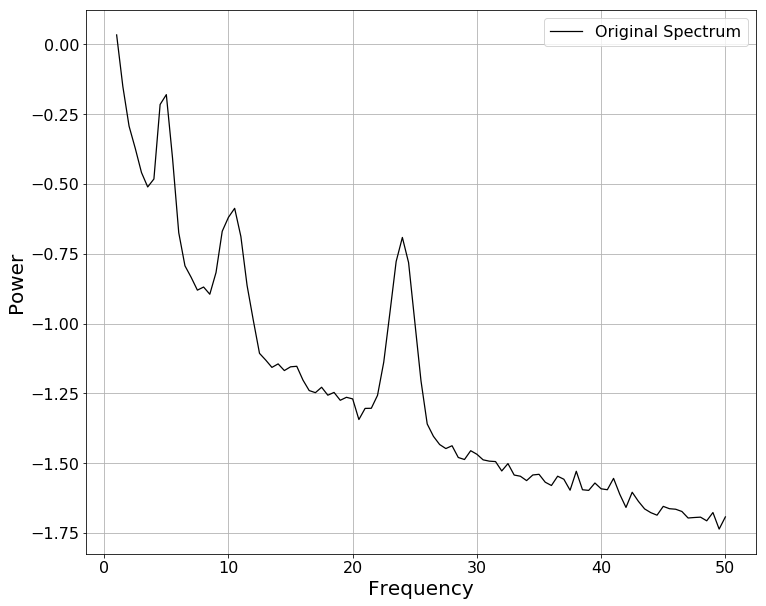

In [29]:
fg.get_fooof(0).plot()

There should be a PSD with two bumps around 4-12 Hz and one around 15-30 Hz

NOTE: The spikes here are greatly exaggerated for demonstration.

In [19]:
#Gather peak info from PSDs
peak = fg.get_all_data('peak_params')

# Calculate theta/beta ratios 

### Peak Power Ratio

This ratio calculation method finds the ratio of the maximum power in each band. Low_band_power/ high_band_power

In [20]:
cf_ratios = calc_group_cf_power_ratio(fg,theta_band,beta_band)

In [21]:
# Check the ratio of power in [4,8] range vs [15,30]
np.mean(cf_ratios)

0.7328867870587777

The result should be in or around [.5, 1.2]

### Average Power Ratio

This method was introduced last notebook. The idea here is that we we take average power in a frequency band and divide it by the average power in the other frequency band. Average power is calculated as the sum of all descrete power values divided by number on power values in that band.

In [24]:
ap_ratios = calc_group_band_ratio(fg, theta_band, beta_band)

In [25]:
np.mean(ap_ratios)

0.48591221623115666

### Density Ratio

This method is similar to the average power ratio except average is calculated as the sum of all the power values divided by the bandwidth

In [27]:
d_ratios = calc_group_density_ratio(fg,theta_band,beta_band)

In [28]:
np.mean(d_ratios)

0.14107128858323903